In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)


dot_data = export_graphviz(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)


'decision_tree.png'

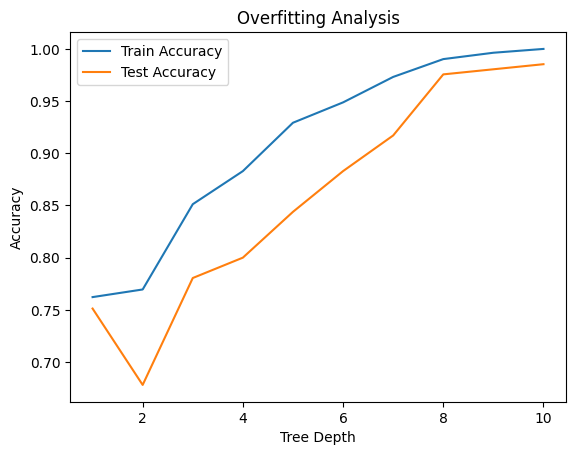

In [ ]:
depths = range(1, 11)
train_acc, test_acc = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Decision Tree Accuracy:", dtree.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Decision Tree Accuracy: 0.7804878048780488
Random Forest Accuracy: 0.9853658536585366


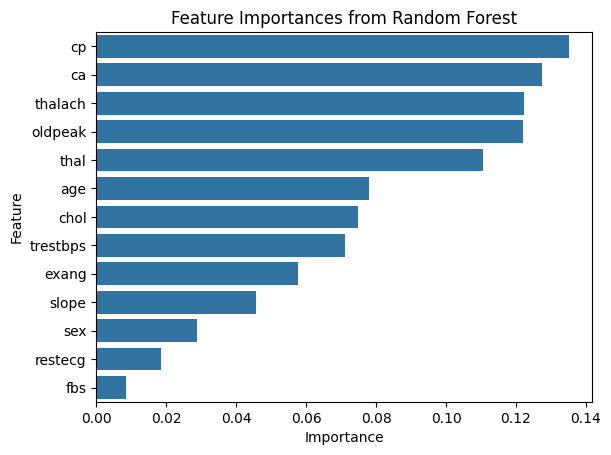

In [ ]:
import seaborn as sns

importances = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances from Random Forest")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Score: 0.9970731707317073
